<a href="https://colab.research.google.com/github/VaibhavBesekar/Credit-Card-Fraud-Detection/blob/main/_SOC_Credit_Card_Fraud_Detection_Final_Submission_on_Github_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**



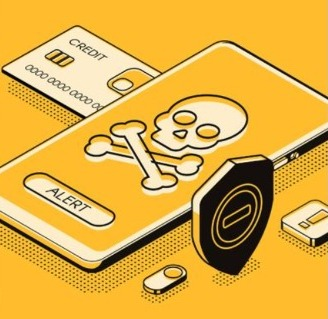

**Task 1**

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task 2**

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

**Task 3**

In [98]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

**Task 4**

In [99]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Task 5**

In [100]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no Null value in any row

In [101]:
df = df.fillna(df.mean())

**Task 6**

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Task 7**

Target variable is class which has 0 and 1 values with 0 being a normal transaction and 1 being a fraudulent transaction. 

Countplot for the number of the number and percentage of fraudulent vs non-fraudulent transcations

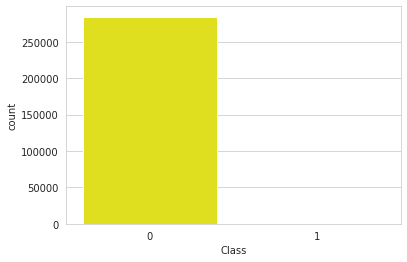

In [103]:
sns.countplot(x = df['Class'], color = 'yellow')

Insight : In the given dataset, Fraudulent Transactions are very less as compared to the Non - Fraudulent Transactions. So, the model can be biased.

**Task 8**

 Scatter plot to observe the distribution of classes with time

Text(0, 0.5, 'Class')

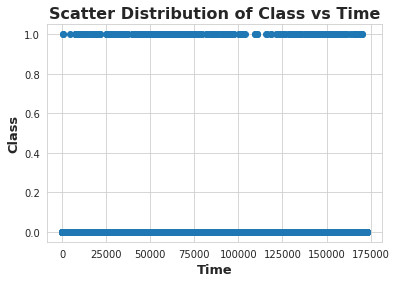

In [104]:
Scatter_plot1 = plt.scatter(x= df['Time'], y=df['Class'])
plt.title('Scatter Distribution of Class vs Time', weight='bold',fontsize = 16)
plt.xlabel('Time',weight = 'bold',fontsize = 13)
plt.ylabel('Class', weight='bold', fontsize= 13)

Insight : There is no dependence/corelation of Time with Class.

**Task 9**

Scatter plot to observe the distribution of Classes with Amount.

Text(0, 0.5, 'Class')

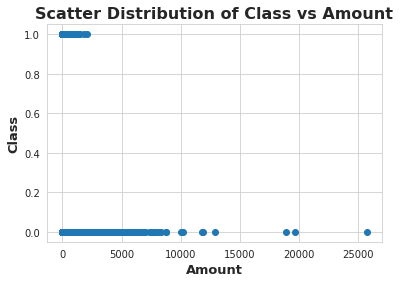

In [105]:
Scatter_plot2 = plt.scatter(x= df['Amount'], y=df['Class'])
plt.title('Scatter Distribution of Class vs Amount', weight='bold',fontsize = 16)
plt.xlabel('Amount',weight = 'bold',fontsize = 13)
plt.ylabel('Class', weight=  'bold',fontsize = 13)

Insight : There is dependence/corelation of Amount with Class.
          There is negative corelation.
          As Amount increases fraudulent transactions decreases.

**Task 10**

 Histogram plot for Amount

Text(0, 0.5, 'Amount')

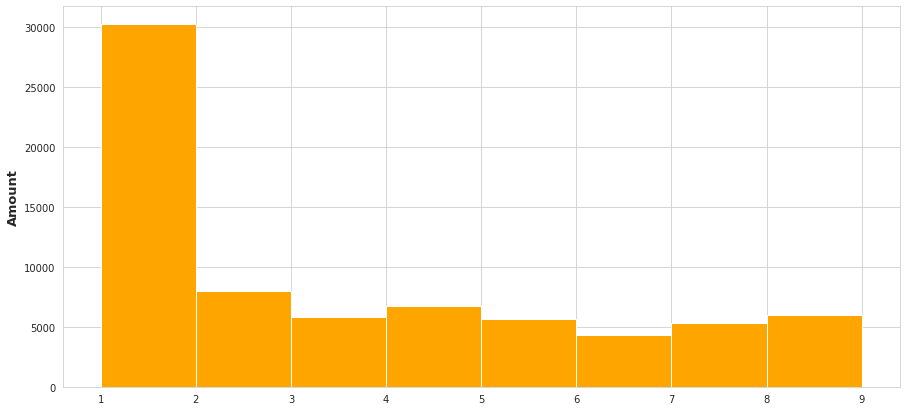

In [106]:
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize =(15,7))
plt.hist(df['Amount'], bins= range(1,10), color = 'orange')
plt.ylabel('Amount',weight = 'bold',fontsize = 13)

 Amounts occurring more frequently in the dataset

In [107]:
df['Amount'].mode()

0    1.0
dtype: float64

 Maximum and Minimum amount in the column.


In [108]:
column1 = df['Amount']
max_value = column1.max()
max_value

25691.16

In [109]:
column2 = df['Amount']
min_value = column2.min()
min_value

0.0

**Task 11**

Split the amount column for fraudulent and non-fraudulent transactions

In [110]:
Dataframe_with_Normal_Transactions= df.loc[df['Class']== 0]
Dataframe_with_Normal_Transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [111]:
Dataframe_with_Fraudulent_Transactions = df.loc[df['Class']== 1]
Dataframe_with_Fraudulent_Transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Histogram plot for Amount in Normal Transactions




Text(0, 0.5, 'Amount')

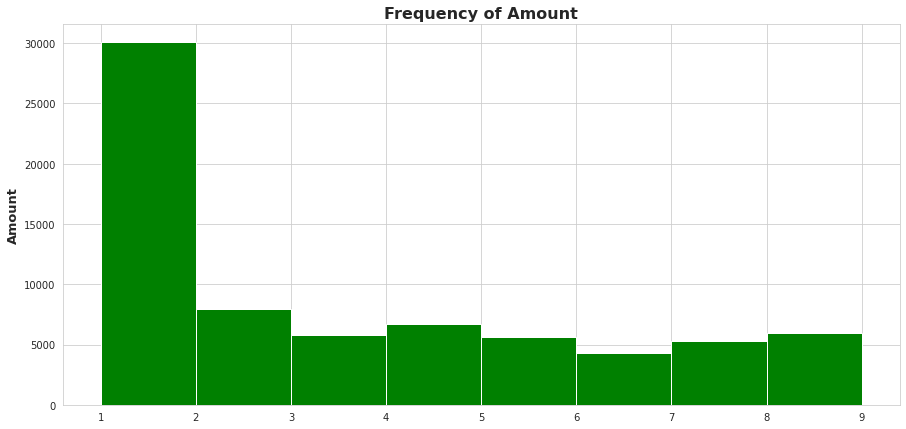

In [112]:
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize =(15,7))
Histogram_for_Normal_transactions = plt.hist(Dataframe_with_Normal_Transactions['Amount'], bins = range(1,10), color='green')
Histogram_for_Normal_transactions 
plt.title('Frequency of Amount', weight='bold',fontsize = 16)
plt.ylabel('Amount',weight = 'bold',fontsize = 13)


Histogram plot for Amount in Fraudulent Transactions

Text(0, 0.5, 'Amount')

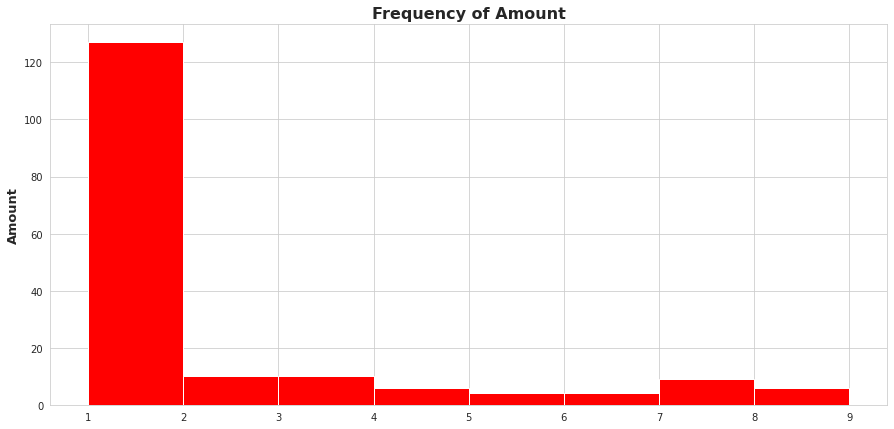

In [113]:
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize =(15,7))
Histogram_for_Fraudlent_transactions = plt.hist(Dataframe_with_Fraudulent_Transactions['Amount'], bins = range(1,10), color ='red')
Histogram_for_Fraudlent_transactions 
plt.title('Frequency of Amount', weight='bold',fontsize = 16)
plt.ylabel('Amount',weight = 'bold',fontsize = 13)

In [114]:
Dataframe_with_Normal_Transactions['Amount'].mode()

0    1.0
dtype: float64

In [115]:
column1 = Dataframe_with_Normal_Transactions['Amount']
max_value = column1.max()
max_value

25691.16

In [116]:
column2 = Dataframe_with_Normal_Transactions['Amount']
min_value = column2.min()
min_value

0.0

In [117]:
Dataframe_with_Fraudulent_Transactions ['Amount'].mode()

0    1.0
dtype: float64

In [118]:
column1 = Dataframe_with_Fraudulent_Transactions ['Amount']
max_value = column1.max()
max_value

2125.87

In [27]:
column2 = Dataframe_with_Fraudulent_Transactions ['Amount']
min_value = column2.min()
min_value

0.0

**Task 12**

Distribution plot of v1 to v28 columns

<Figure size 432x288 with 0 Axes>

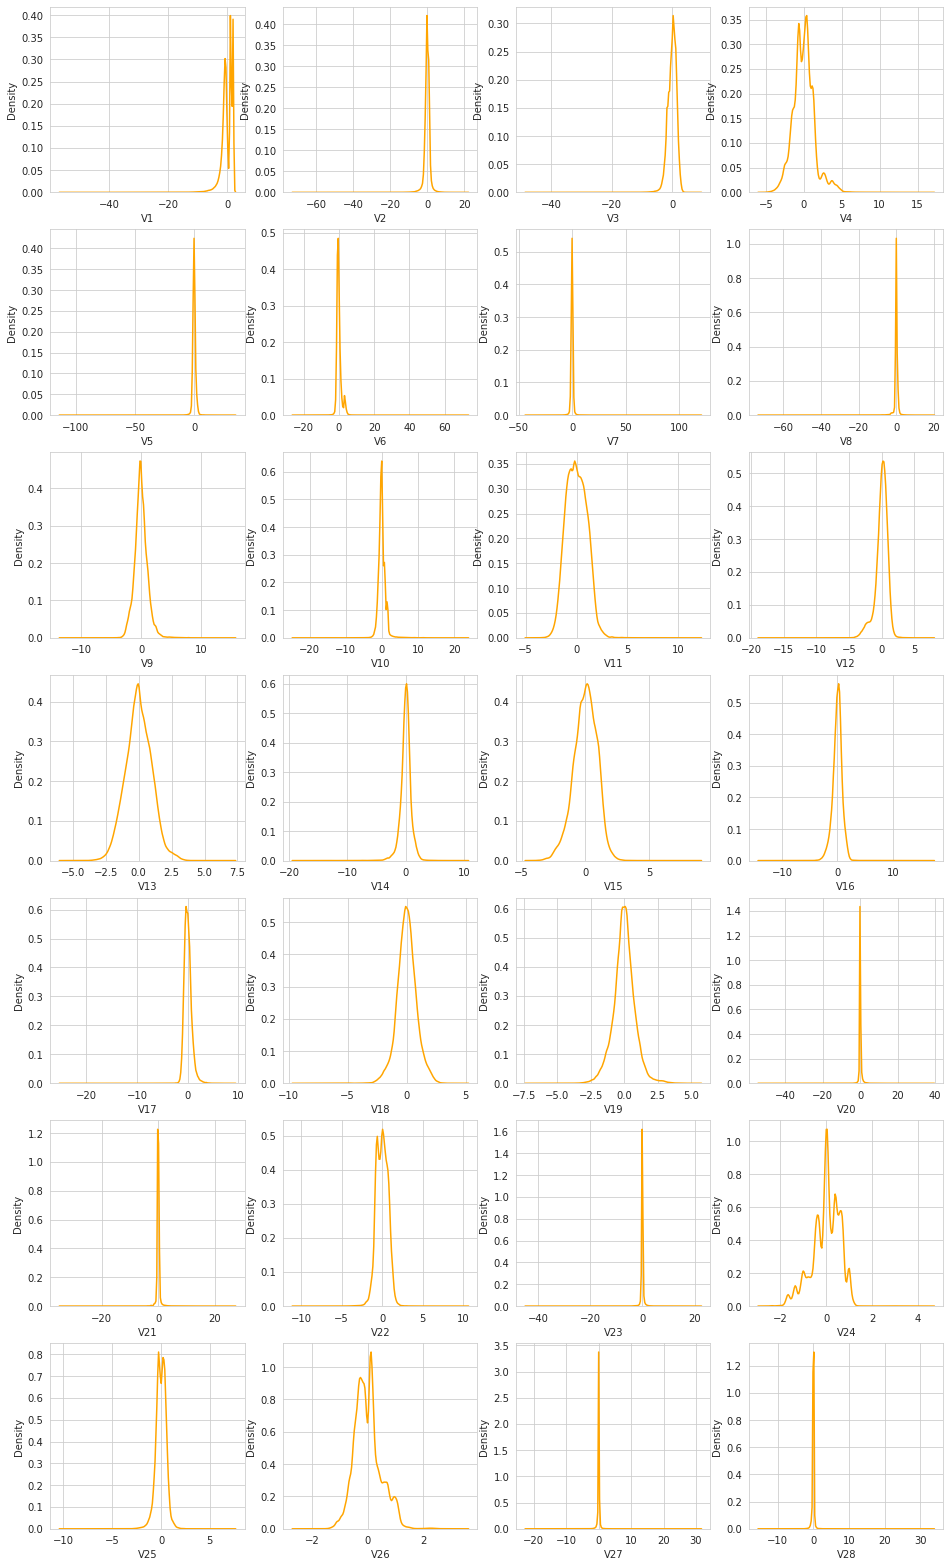

In [28]:
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))

for i in range(1,29):
  plt.subplot(7,4,i)
  sns.kdeplot(df[f'V{i}'], color ='orange')
plt.show()

**Task 13**

<Figure size 432x288 with 0 Axes>

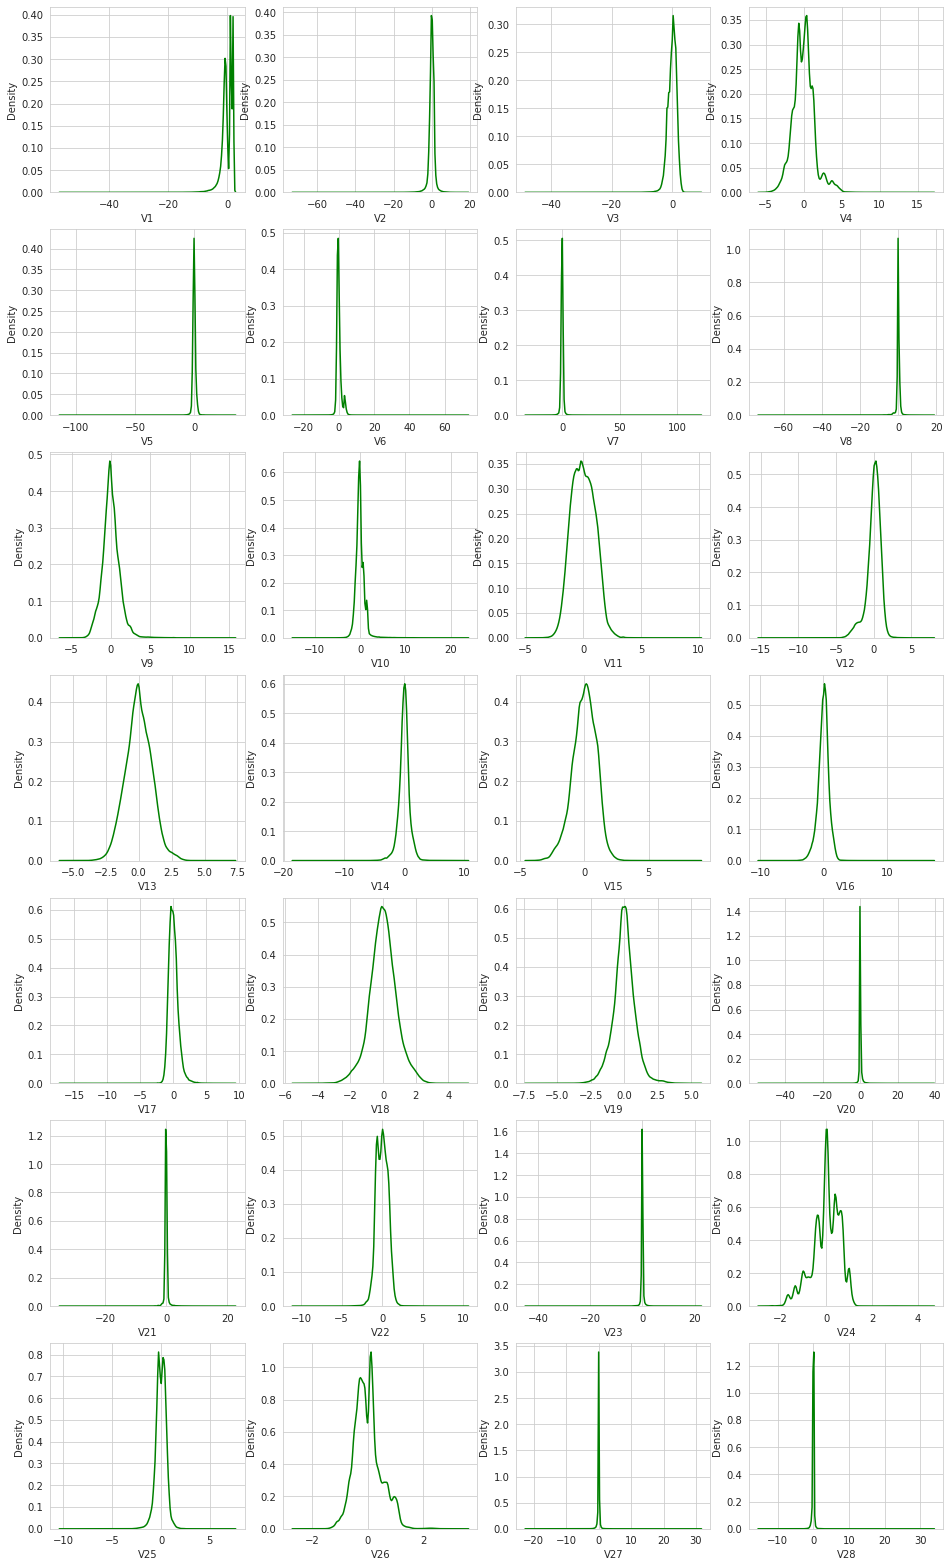

In [29]:
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))

for i in range(1,29):
  plt.subplot(7,4,i)
  sns.kdeplot(Dataframe_with_Normal_Transactions[f'V{i}'], color='green')
plt.show()

<Figure size 432x288 with 0 Axes>

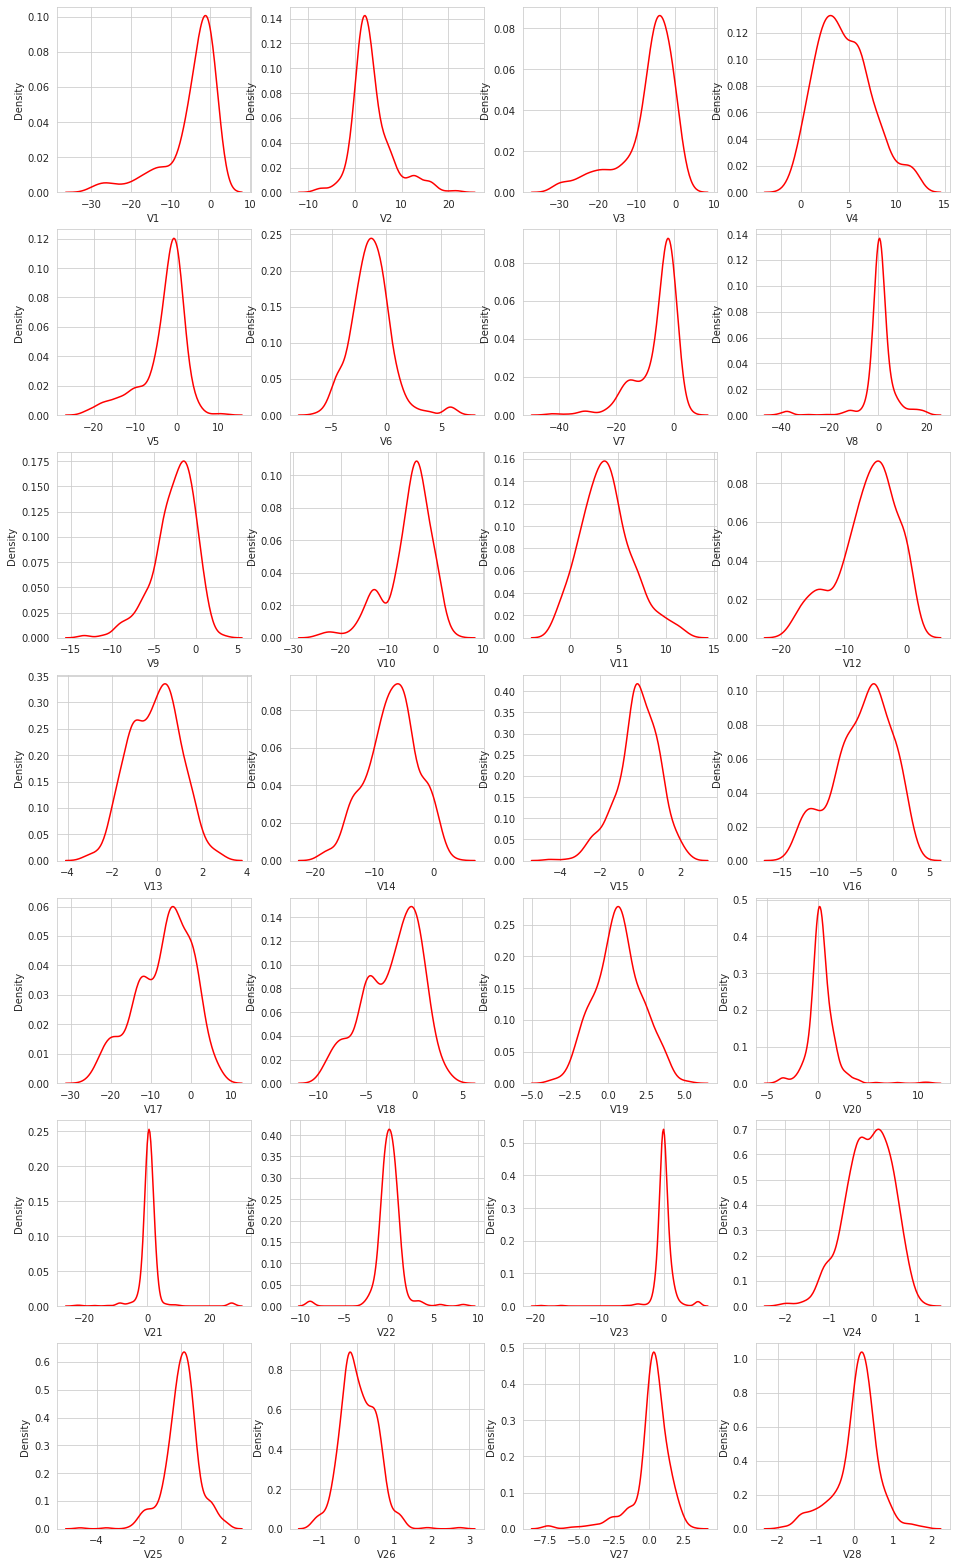

In [30]:
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))

for i in range(1,29):
  plt.subplot(7,4,i)
  sns.kdeplot(Dataframe_with_Fraudulent_Transactions[f'V{i}'], color='red')
plt.show()

**Task 14**

Separation of target and feature variables

In [31]:
y = df['Class']
X = df.drop(['Class'], axis =1)

**Task 15**

We see no dependence of time on the target class, so we will drop it 

In [32]:
 X = df.drop(['Time'], axis =1 )
 df = df.drop(['Time'], axis =1 )


V1 to v28 columns are already scaled

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X[['Amount']]))
StandardScaler()


StandardScaler()


StandardScaler()

In [34]:
print(scaler.mean_)

[88.34961925]


In [35]:
print(scaler.transform(X[['Amount']]))
df['Amount'] = scaler.transform(X[['Amount']])

[[ 0.24496426]
 [-0.34247454]
 [ 1.16068593]
 ...
 [-0.0818393 ]
 [-0.31324853]
 [ 0.51435531]]


**Task 16**

Eliminate skewness from data

In [36]:
df.skew()

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [37]:
X1 = X.columns
X1

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [38]:
for column in df.columns:
  print(column)

V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


In [39]:
for column in df.columns:
  a = df[column].skew()
  if a<-1 or a>1:
    df[column] = np.cbrt(df[column])
    print('new_skewness'+ str(column), df[column].skew())

new_skewnessV1 -0.11035562327908005
new_skewnessV2 -0.1640067991357601
new_skewnessV3 -0.23009964558752732
new_skewnessV5 0.10352378317578162
new_skewnessV6 0.5725139674885826
new_skewnessV7 -0.08971572712744195
new_skewnessV8 -0.21338877725125788
new_skewnessV10 0.279217583522796
new_skewnessV12 -0.36194299425223103
new_skewnessV14 -0.1475138546966051
new_skewnessV16 -0.16024954212144563
new_skewnessV17 0.18217051898614242
new_skewnessV20 0.42943408417886186
new_skewnessV21 0.19327853334430767
new_skewnessV23 0.09091777855085366
new_skewnessV27 -0.08159424676524164
new_skewnessV28 -0.25615806432033744
new_skewnessAmount 1.6038812083759233
new_skewnessClass 23.99757931064749


**Task 17**

In [40]:
# Splitting Data into Training and Test Set
# Using ScikitLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, test_size = 0.2, random_state =42)

**Task 18**

Logistic Regression Model

In [41]:
# Implementing LogisticRegression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9991924440855307

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.62      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962



Decision Tree Classifier Model

In [45]:
# Implementing DecisionTreeClassifier Model
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



Random Forest Classifier Model

In [49]:
# Implementing RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



Support Vector Machine Model

In [53]:
# Implementing SupportVectorMachine Model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9987711105649381

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.38      0.51        98

    accuracy                           1.00     56962
   macro avg       0.90      0.69      0.76     56962
weighted avg       1.00      1.00      1.00     56962



XgBoost Model

In [57]:
# Implementing XgBoost Model
# We can use GradientBoostingClassifier or XGBClassifier
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier()

In [58]:
y_pred = xgb_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



**Task 19**

F1 scores for data are low because the data is imbalanced.
As we can see from countplot. We can see that there are very  very less fraudulent transactions and very more non-fraudulent transactions.

In [61]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)


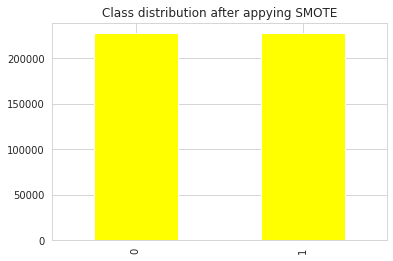

In [62]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', color='yellow')


This graph clearly shows that we now have a huge number of Fraudulent transactions that we did not have before. Those are all synthetic data points that have been created using SMOTE.

**Task 20**

Logistic Regression Model

In [63]:
# Implementing LogisticRegression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [64]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9995786664794073

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      1.00      0.89        98

    accuracy                           1.00     56962
   macro avg       0.90      1.00      0.95     56962
weighted avg       1.00      1.00      1.00     56962



Decision Tree Classifier Model


In [67]:
# Implementing DecisionTreeClassifier Model
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [68]:
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



Random Forest Classifier Model

In [71]:
# Implementing RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [72]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



Support Vector Machine Model

In [ ]:
# Implementing SupportVectorMachine Model
from sklearn.svm import SVC
model = SVC()
model.fit(X_resampled,y_resampled)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

XgBoost Model

In [ ]:
# Implementing XgBoost Model
# We can use GradientBoostingClassifier or XGBClassifier
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_resampled,y_resampled)

In [ ]:
y_pred = xgb_classifier.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

**Task 21**

**Deep learning model**

In [119]:
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [120]:
df = df.drop(['Amount','Time'], axis = 1)
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [121]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [122]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

We will write 30 in input dimension so that it can match , if we write 29 it can create an error.

In [126]:
model = Sequential([
Dense(input_dim = 30, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),])

Training model with X_train, y_train

In [127]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
15190/15190 [==============================] - 36s 2ms/step - loss: 0.0208 - accuracy: 0.9980
Epoch 2/5
15190/15190 [==============================] - 28s 2ms/step - loss: 0.0057 - accuracy: 0.9992
Epoch 3/5
15190/15190 [==============================] - 27s 2ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 4/5
15190/15190 [==============================] - 27s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/5
15190/15190 [==============================] - 27s 2ms/step - loss: 0.0050 - accuracy: 0.9995


In [128]:
score = model.evaluate(X_test, y_test)
print(score)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0028 - accuracy: 0.9996
[0.0028081065975129604, 0.9995962381362915]


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



Training model with X_resampled, y_resampled

In [131]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_resampled, y_resampled, batch_size = 15, epochs = 5)

Epoch 1/5
30327/30327 [==============================] - 59s 2ms/step - loss: 0.0135 - accuracy: 0.9972
Epoch 2/5
30327/30327 [==============================] - 54s 2ms/step - loss: 0.0065 - accuracy: 0.9987
Epoch 3/5
30327/30327 [==============================] - 56s 2ms/step - loss: 0.0052 - accuracy: 0.9990
Epoch 4/5
30327/30327 [==============================] - 54s 2ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 5/5
30327/30327 [==============================] - 55s 2ms/step - loss: 0.0045 - accuracy: 0.9993


In [132]:
score = model.evaluate(X_test, y_test)
print(score)

1781/1781 [==============================] - 4s 2ms/step - loss: 9.7201e-04 - accuracy: 0.9999
[0.0009720118250697851, 0.9998595714569092]


In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

